In [19]:
import pandas as pd
import timeit
import pickle

In [4]:
data = pd.read_csv('data.CSV')

/home/cijo/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,1,17,D,M,69,Y,NaN,Y,Y,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,10,F,M,76,Y,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,43,F,F,71,N,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,6,F,M,81,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,20,F,M,78,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [6]:
required_fields = ['RCONSC', 'SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RVISINF', 'RSBP', 'RDEF1', 'RDEF2', 'RDEF3',
                   'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK']
data = data[required_fields]
data.dropna()
data.to_pickle('predictstrokedata.pkl')
data.to_csv('predictstrokedata.csv')

In [7]:
import numpy as np
from sklearn import svm
from sklearn.cross_validation import train_test_split

/home/cijo/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
data_d = pd.get_dummies(data)
x = data_d.loc[:, 'AGE':'STYPE_TACS'].values
data = pd.read_csv('predictstrokedata.csv')
output_data = data[['DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK']]
output_data = output_data.values
stroke_type=[]
for row in output_data:
    row = list(row)
    try:
        stroke_type.append(row.index('Y'))
    except:
        stroke_type.append(-1)
y = stroke_type

In [9]:
clf = svm.SVC()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [18]:
print "starting training"
start_time = timeit.default_timer()
model = clf.fit(x_train, y_train)
print "training completed in %s"  % (timeit.default_timer() - start_time)
print "starting testing"
start_time = timeit.default_timer()
print model.score(x_test, y_test)
print "testing completed in %s"  % (timeit.default_timer() - start_time)
print("done")

starting training
training completed in 25.2429509163
starting testing
0.8960727148
testing completed in 5.52331399918
done


In [21]:
# saving the model to file
pickle.dump(model, open('svmstroketypepredictor.pkl', 'wb'))

In [24]:
data = pd.read_csv('predictstrokedata.csv')

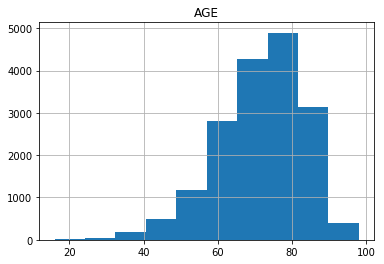

In [44]:
data[data.DDIAGISC == 'Y'].hist(column='AGE')
plt.show()